# MINI PROJETO - MLP - TITANIC SURVIVAL PREDICTION

### Projeto da cadeira de Sistemas Inteligentes (2023.2 - IF684EC - CIn - UFPE) que consiste em utilizar um Multilayer Perceptron (MLP) para prever se uma pessoa sobreviveria ou não ao desastre do Titanic.

### Desenvolvido por:

> Lucas Yule Rocha de Melo Araujo - lyrma@cin.ufpe.br

> Rafael do Nascimento Moura - rnm4@cin.ufpe.br

> Rodrigo Rocha Moura - rrm2@cin.ufpe.br

## Instalando dependências



In [1]:
!pip install numpy pandas matplotlib scikit-learn seaborn

## Importando as bibliotecas

In [2]:
import numpy as np # utilizada para
import pandas as pd # utilizada para analisar a base de dados
import matplotlib.pyplot as plt # utilizada para plotar gráficos
import seaborn as sns #utilizada para visualização de dados
from sklearn.neural_network import MLPClassifier # Multilayer Perceptron
from sklearn.model_selection import GridSearchCV, learning_curve # cross validation

## Analisando a base de dados

In [3]:
titanic_data = pd.read_csv('data/train.csv') # titanic_data contém o conteúdo de treinamento

In [4]:
titanic_data # uma breve visualização do conteúdo de treinamento

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


#### É importante entender cada variável para construir relações que ajudarão a resolver o problema. Desse modo, aqui está a descrição das colunas do dataframe:

> PassengerId: ID do passageiro.

> Survived: 0 - passageiro não sobreviveu ao desastre; 1 - passageiro sobreviveu ao desastre.

> Pclass: A classe do ticket do passageiro, que pode ser primeira classe (1), segunda classe (2) e terceira classe (3).

> Name: Nome do passageiro.

> Sex: male (masculino) ou female (feminino).

> Age: Idade do passageiro. ***É fracionária se menor que 1. Se a idade for uma estimativa, então é da forma xx.5.***

> SibSp: Quantidade de passageiros que são das categorias irmão, irmã, meio-irmão, meio-irmã, marido, esposa.

> Parch: Quantidades de passageiros que são das categorias pai, mãe, filha, filho, enteada, enteado.

> Ticket: O código do ticket do passageiro.

> Fare: O preço da passagem do passageiro.

> Cabin: O número da cabine do passageiro.

> Embarked: O porto pelo qual o passageiro embarcou (C = Cherbourg, Q = Queenstown, S = Southampton).

In [5]:
titanic_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


**Analisando a coluna de sexo:**

In [6]:
print(titanic_data['Sex'].value_counts(dropna = False)) # quantidade de homens e mulheres à bordo
titanic_data[['Sex', 'Survived']].groupby('Sex', as_index = False).mean().sort_values(by = 'Survived', ascending = False) # probabilidade de sobrevivência por sexo

male      577
female    314
Name: Sex, dtype: int64


,Sex,Survived
0,female,0.742038
1,male,0.188908


<ipython-input-7-408dddde48bf>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = 'Sex', y ='Survived', data = titanic_data, palette = "Spectral") # visualização da probabilidade acima


Text(0.5, 1.0, 'Probabilidade de Sobrevivência por Sexo')

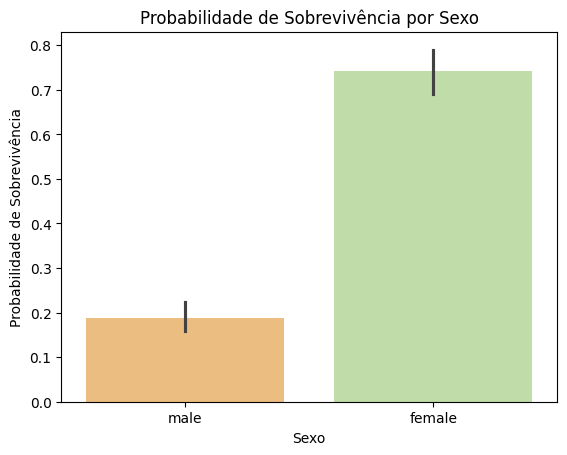

In [7]:
sns.barplot(x = 'Sex', y ='Survived', data = titanic_data, palette = "Spectral") # visualização da probabilidade acima
plt.xlabel('Sexo')
plt.ylabel('Probabilidade de Sobrevivência')
plt.title('Probabilidade de Sobrevivência por Sexo')

**Analisando a coluna da classe do passageiro:**

In [8]:
print(titanic_data['Pclass'].value_counts(dropna = False)) # quantidade de passageiros por classe
titanic_data[['Pclass', 'Survived']].groupby(['Pclass'], as_index = False).mean().sort_values(by = 'Survived', ascending = False) # probabilidade de sobrevivência por classe

3    491
1    216
2    184
Name: Pclass, dtype: int64


,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


<ipython-input-9-e9c0df52c3c0>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = 'Pclass', y ='Survived', data = titanic_data, palette = "cubehelix") # visualização da probabilidade acima


Text(0.5, 1.0, 'Probabilidade de Sobrevivência por Classe de Passageiro')

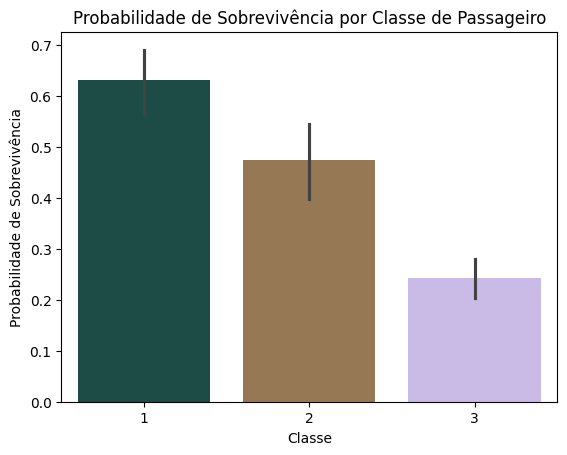

In [9]:
sns.barplot(x = 'Pclass', y ='Survived', data = titanic_data, palette = "cubehelix") # visualização da probabilidade acima
plt.xlabel('Classe')
plt.ylabel('Probabilidade de Sobrevivência')
plt.title('Probabilidade de Sobrevivência por Classe de Passageiro')

Text(0.5, 1.0, 'Probabilidade de Sobrevivência por Sexo e por Classe de Passageiro')

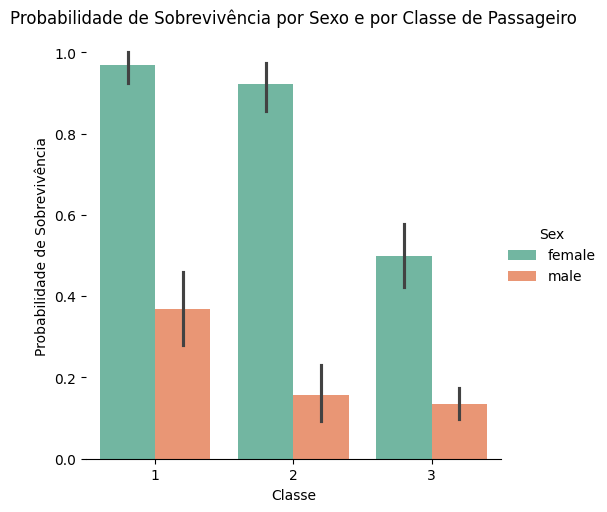

In [10]:
g = sns.catplot(x = 'Pclass', y = 'Survived', hue = 'Sex', data = titanic_data, kind = 'bar', palette = "Set2")
g.despine(left = True)
plt.xlabel('Classe')
plt.ylabel('Probabilidade de Sobrevivência')
plt.title('Probabilidade de Sobrevivência por Sexo e por Classe de Passageiro')

**Analisando a coluna do porto de embarque do passageiro:**

In [11]:
print(titanic_data['Embarked'].value_counts(dropna = False)) # quantidade de embarques por portos
titanic_data[['Embarked', 'Survived']].groupby(['Embarked'], as_index = False).mean().sort_values(by = 'Survived', ascending = False) # probabilidade de sobrevivência por porto de embarque

S      644
C      168
Q       77
NaN      2
Name: Embarked, dtype: int64


,Embarked,Survived
0,C,0.553571
1,Q,0.389610
2,S,0.336957


<ipython-input-12-5bf658b81302>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = 'Embarked', y ='Survived', data = titanic_data, palette = sns.color_palette("husl", 8)) # visualização da probabilidade acima
<ipython-input-12-5bf658b81302>:1: UserWarning: The palette list has more values (8) than needed (3), which may not be intended.
  sns.barplot(x = 'Embarked', y ='Survived', data = titanic_data, palette = sns.color_palette("husl", 8)) # visualização da probabilidade acima


Text(0.5, 1.0, 'Probabilidade de Sobrevivência por Porto de Embarque')

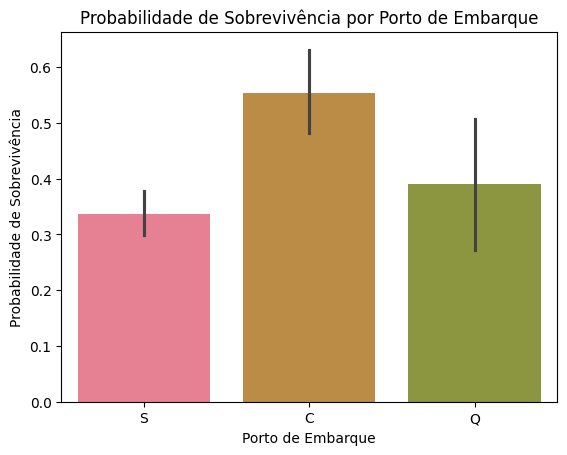

In [12]:
sns.barplot(x = 'Embarked', y ='Survived', data = titanic_data, palette = sns.color_palette("husl", 8)) # visualização da probabilidade acima
plt.xlabel('Porto de Embarque')
plt.ylabel('Probabilidade de Sobrevivência')
plt.title('Probabilidade de Sobrevivência por Porto de Embarque')

A partir da distribuição acima, observa-se que há maior chance de sobrevivência caso o embarque seja no porto de Cherbourg e menor caso seja em Southampton.

<ipython-input-13-9439c4920a5c>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  g = sns.catplot(x = 'Pclass', col = 'Embarked', data = titanic_data, kind = 'count', palette = sns.color_palette("husl", 8)) # sobrevivência por classe e por porto de embarque
<ipython-input-13-9439c4920a5c>:1: UserWarning: The palette list has more values (8) than needed (3), which may not be intended.
  g = sns.catplot(x = 'Pclass', col = 'Embarked', data = titanic_data, kind = 'count', palette = sns.color_palette("husl", 8)) # sobrevivência por classe e por porto de embarque


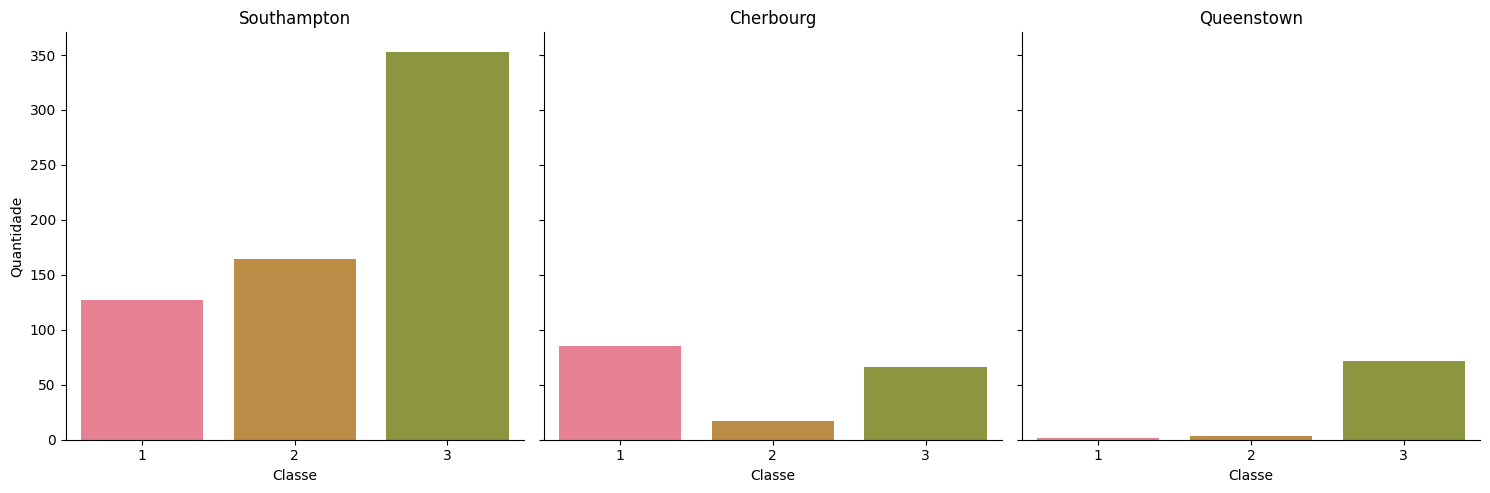

In [13]:
g = sns.catplot(x = 'Pclass', col = 'Embarked', data = titanic_data, kind = 'count', palette = sns.color_palette("husl", 8)) # sobrevivência por classe e por porto de embarque

titulos = ['Southampton', 'Cherbourg', 'Queenstown']
for ax, titulo in zip(g.axes.flat, titulos):
    ax.set_title(titulo)
    ax.set_xlabel('Classe')
    ax.set_ylabel('Quantidade')

plt.show()

Foi apresentado anteriormente que a terceira classe é a que possui a menor chance de sobrevivência.

A discrepância apresentada no caso dos portos de embarque pode ser explicada pela distribuição acima, pois a maior parte dos passageiros da terceira classe embarcaram no porto de Southampton.

**Analisando a coluna de idade:**

Text(0.5, 1.0, 'Distribuição de Idade dos Passageiros')

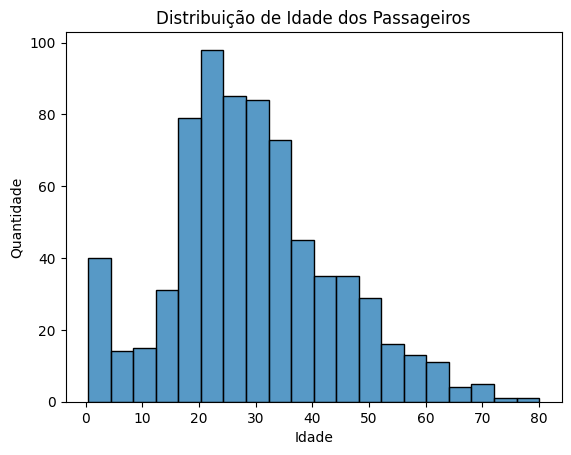

In [14]:
sns.histplot(titanic_data['Age']) # histograma
plt.xlabel('Idade')
plt.ylabel('Quantidade')
plt.title('Distribuição de Idade dos Passageiros')

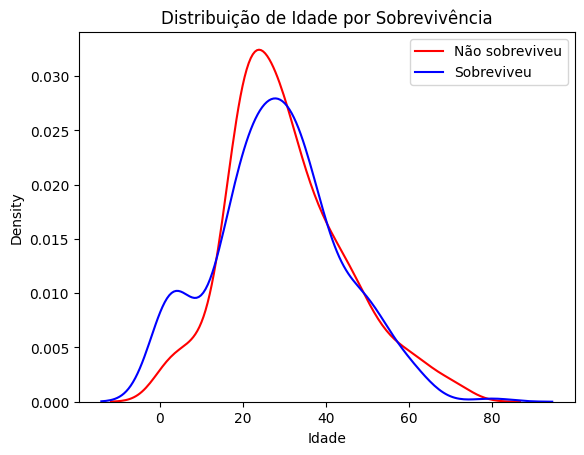

In [15]:
sns.kdeplot(titanic_data['Age'][titanic_data['Survived'] == 0], label = 'Não sobreviveu', color='red') # distribuição de idade por sobrevivência
sns.kdeplot(titanic_data['Age'][titanic_data['Survived'] == 1], label = 'Sobreviveu', color='blue')
plt.xlabel('Idade')
plt.title('Distribuição de Idade por Sobrevivência')
plt.legend()

**Explorando as correlações entre as variáveis numéricas e a sobrevivência do passageiro:**

<Axes: >

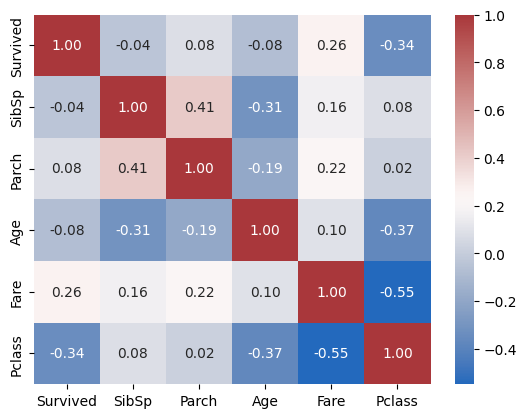

In [16]:
sns.heatmap(titanic_data[['Survived', 'SibSp', 'Parch', 'Age', 'Fare', 'Pclass']].corr(), annot = True, fmt = '.2f', cmap = 'vlag')

Ao observar o heatmap acima, vemos que *Pclass* (classe social) e *Fare* (preço da passagem) são as que possuem maior correlação com a sobrevivência e inclusive entre si. O que nos diz que uma pessoa pertencente a uma classe social mais alta (menor número) pagou mais pela passagem e teve mais chance de sobrevivência.


## Dividindo o dataset de treinamento e tratando os dados

Primeiramente, devemos conferir a distribuição dos sobreviventes e não sobreviventes:

In [17]:
# Conta a quantidade de 0's e 1's na coluna "Survived"
survived_counts = titanic_data['Survived'].value_counts()

# Imprime os resultados
print(f"Quantidade de 0's (não sobreviventes): {survived_counts[0]}")
print(f"Quantidade de 1's (sobreviventes): {survived_counts[1]}")

Quantidade de 0's (não sobreviventes): 549
Quantidade de 1's (sobreviventes): 342


Como está desigual, devemos igualar a quantidade de 0's e 1's.

In [18]:
# Primeiro, selecione aleatoriamente 207 linhas dos sobreviventes
sobreviventes_aleatorios = titanic_data[titanic_data['Survived'] == 1].sample(n=207, random_state=42)

# Adicione essas linhas ao DataFrame original
titanic_data = pd.concat([titanic_data, sobreviventes_aleatorios])

# Embaralhe o DataFrame
titanic_data = titanic_data.sample(frac=1, random_state=42).reset_index(drop=True)

In [19]:
survived_counts = titanic_data['Survived'].value_counts()

# Imprime os resultados
print(f"Quantidade de 0's (não sobreviventes): {survived_counts[0]}")
print(f"Quantidade de 1's (sobreviventes): {survived_counts[1]}")

Quantidade de 0's (não sobreviventes): 549
Quantidade de 1's (sobreviventes): 549


Agora podemos dividir o dataset de treino e de teste utilizando o arquivo train.csv.

A divisão é 80/20 mas não é aleatória.

Aqui divide-se de forma equivalente entre TRAIN e TEST as variáveis descritas, isto é, as variáveis que consideramos mais importantes para a resolução do problema.

In [20]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2)
for train_indices, test_indices in split.split(titanic_data, titanic_data[["Survived", "Pclass", "Sex"]]):
    strat_train_set = titanic_data.loc[train_indices]
    strat_test_set = titanic_data.loc[test_indices]

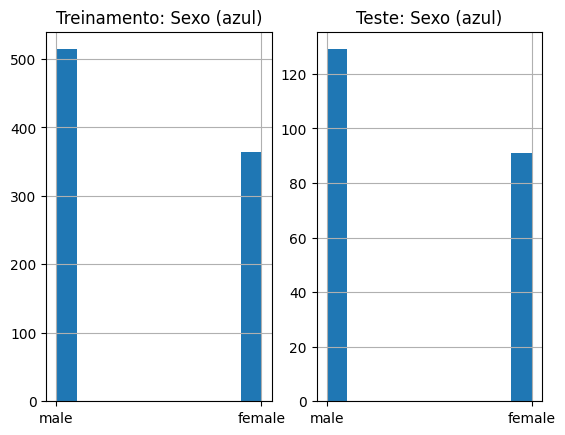

In [21]:
plt.subplot(1,2,1)
strat_train_set['Sex'].hist()
plt.title('Treinamento: Sexo (azul)')

plt.subplot(1,2,2)
strat_test_set['Sex'].hist()
plt.title('Teste: Sexo (azul)')

plt.show()

<ipython-input-22-6ab62c2e2b01>:2: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1, 2, 1)
<ipython-input-22-6ab62c2e2b01>:6: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1, 2, 2)


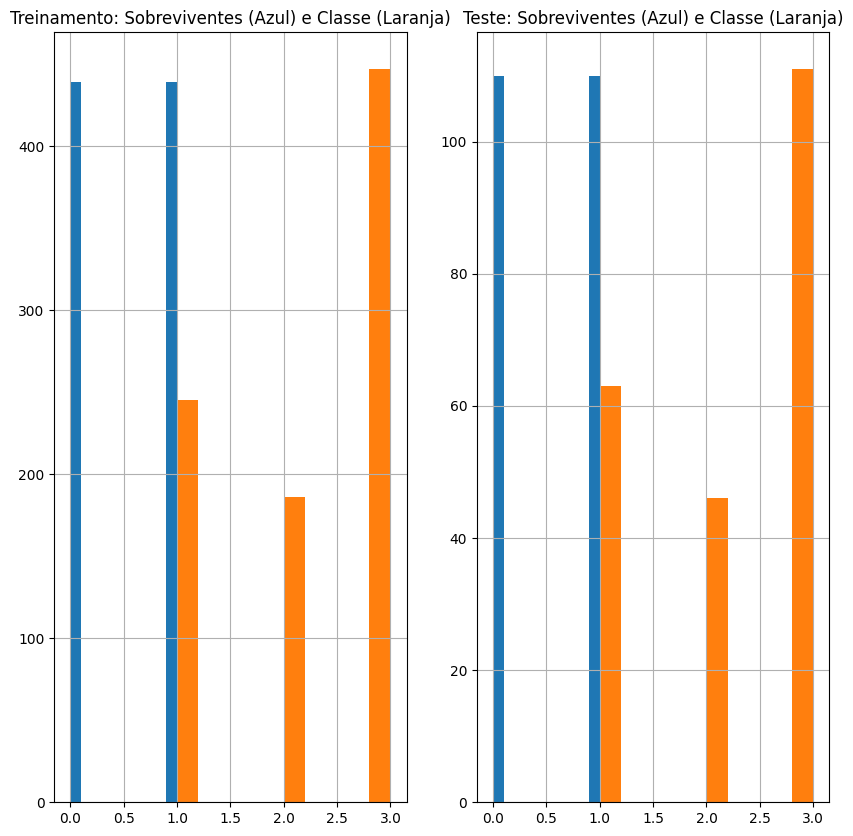

In [22]:
fig, axs = plt.subplots(nrows=1, ncols=5, figsize=(10, 10))
plt.subplot(1, 2, 1)
strat_train_set['Survived'].hist()
strat_train_set['Pclass'].hist()

plt.subplot(1, 2, 2)
strat_test_set['Survived'].hist()
strat_test_set['Pclass'].hist()

# Adicione títulos e rótulos
plt.subplot(1, 2, 1)
plt.title('Treinamento: Sobreviventes (Azul) e Classe (Laranja)')

plt.subplot(1, 2, 2)
plt.title('Teste: Sobreviventes (Azul) e Classe (Laranja)')

plt.show()

Temos valores faltando?

In [23]:
strat_train_set.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 878 entries, 781 to 342
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  878 non-null    int64  
 1   Survived     878 non-null    int64  
 2   Pclass       878 non-null    int64  
 3   Name         878 non-null    object 
 4   Sex          878 non-null    object 
 5   Age          710 non-null    float64
 6   SibSp        878 non-null    int64  
 7   Parch        878 non-null    int64  
 8   Ticket       878 non-null    object 
 9   Fare         878 non-null    float64
 10  Cabin        240 non-null    object 
 11  Embarked     875 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 89.2+ KB


Temos valores faltando na coluna de Idade.

Assim, vamos preencher as células vazias com a média da Idade.

In [24]:
from sklearn.base import BaseEstimator, TransformerMixin # mixa automaticamente as funções fit e transform sem ter que definir explicitamente
from sklearn.impute import SimpleImputer

class AgeImputer(BaseEstimator, TransformerMixin):
  def fit(self, X, y=None):
    return self

  def transform(self, X):
    imputer = SimpleImputer(strategy = "mean")
    X['Age'] = imputer.fit_transform(X[['Age']])
    return X


Visando facilitar a análise do dataset pelo modelo, vamos transformar as variáveis de categorias em variáveis numéricas da seguinte maneira:

> Substitui-se uma coluna de categoria por novas colunas que são seus possíveis valores, os quais só valem ou 0 ou 1.

O processo acima é aplicado nas colunas de sexo e do porto de embarque.

In [25]:
from sklearn.preprocessing import OneHotEncoder

class FeatureEncoder(BaseEstimator, TransformerMixin):
  def fit(self, X, y=None):
    return self

  def transform(self, X):
    encoder = OneHotEncoder()
    matrix = encoder.fit_transform(X[['Embarked']]).toarray()

    column_names = ["C", "S", "Q", "N"]

    for i in range(len(matrix.T)):
      X[column_names[i]] = matrix.T[i]

    matrix = encoder.fit_transform(X[['Sex']]).toarray()

    column_names = ["Female", "Male"]

    for i in range(len(matrix.T)):
      X[column_names[i]] = matrix.T[i]

    return X


Também removemos as colunas que não afetam na resolução do problema: nome, código do ticket e cabine.

In [26]:
class FeatureDropper (BaseEstimator, TransformerMixin):

   def fit(self, X, y=None):
    return self

   def transform(self, X):
    return X.drop(["Embarked","Name", "Ticket", "Cabin", "Sex", "N"], axis = 1, errors="ignore")

In [27]:
from sklearn.pipeline import Pipeline

pipeline = Pipeline([("ageimputer", AgeImputer()),("featureencoder", FeatureEncoder()),("featuredropper", FeatureDropper())])

In [28]:
strat_train_set = pipeline.fit_transform(strat_train_set)

In [29]:
strat_train_set

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,C,S,Q,Female,Male
781,706,0,2,39.000000,0,0,26.0000,0.0,0.0,1.0,0.0,1.0
1085,386,0,2,18.000000,0,0,73.5000,0.0,0.0,1.0,0.0,1.0
102,24,1,1,28.000000,0,0,35.5000,0.0,0.0,1.0,0.0,1.0
570,850,1,1,29.769493,1,0,89.1042,1.0,0.0,0.0,1.0,0.0
901,672,0,1,31.000000,1,0,52.0000,0.0,0.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
846,670,1,1,29.769493,1,0,52.0000,0.0,0.0,1.0,1.0,0.0
289,590,0,3,29.769493,0,0,8.0500,0.0,0.0,1.0,0.0,1.0
488,91,0,3,29.000000,0,0,8.0500,0.0,0.0,1.0,0.0,1.0
197,300,1,1,50.000000,0,1,247.5208,1.0,0.0,0.0,1.0,0.0


In [30]:
strat_train_set.info() # agora não há mais células vazias

<class 'pandas.core.frame.DataFrame'>
Int64Index: 878 entries, 781 to 342
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  878 non-null    int64  
 1   Survived     878 non-null    int64  
 2   Pclass       878 non-null    int64  
 3   Age          878 non-null    float64
 4   SibSp        878 non-null    int64  
 5   Parch        878 non-null    int64  
 6   Fare         878 non-null    float64
 7   C            878 non-null    float64
 8   S            878 non-null    float64
 9   Q            878 non-null    float64
 10  Female       878 non-null    float64
 11  Male         878 non-null    float64
dtypes: float64(7), int64(5)
memory usage: 89.2 KB


## Experimentos:

Como estamos utilizando um MLP, faz-se necessário destacar a função
```python
StandardScaler()
```
presente abaixo, a qual normaliza os valores removendo a média e escalando para a variância unitária.

Aplicando o tratamento de dados ao dataset de treino (80% de train.csv).

In [31]:
from sklearn.preprocessing import StandardScaler

X = strat_train_set.drop(['Survived'], axis=1)
y = strat_train_set['Survived']

scaler = StandardScaler()
X_data = scaler.fit_transform(X)
y_data = y.to_numpy()

Aplicando o tratamento de dados ao dataset de teste (20% de train.csv).

In [32]:
strat_test_set = pipeline.fit_transform(strat_test_set)
strat_test_set
X_test = strat_test_set.drop(['Survived'], axis=1)
y_test = strat_test_set['Survived']

scaler = StandardScaler()
X_data_test = scaler.fit_transform(X_test)
y_data_test = y_test.to_numpy()

Aplicando o tratamento de dados ao dataset de treino completo (train.csv).

In [33]:
final_data = pipeline.fit_transform(titanic_data)
X_final = final_data.drop(['Survived'], axis=1)
y_final = final_data['Survived']

scaler = StandardScaler()
X_data_final = scaler.fit_transform(X_final)
y_data_final = y_final.to_numpy()

Descrição dos parâmetros do MLPClassifier:

- hidden_layer_sizes: Uma tupla com N elementos que representa as N camadas intermediárias do MLP. O valor de cada elemento é a quantidade de neurônios presente na camada respectiva.

- activation (Função de ativação): Como os neurônios calculam sua saída a partir da entrada.

- solver: O solucionador para otimização dos pesos.

- alpha: O quanto que a regularização L2 afeta os valores do pesos. Utilizado para evitar overfitting.

- learning_rate: A taxa de aprendizado para atualização dos pesos.

- early_stopping: Se esse parâmetro estiver ativado, temos que se a pontuação de validação não melhora em no mínimo $10^{-4}$ por 10 épocas seguidas, então termina-se o treinamento.

**Experimento 1:**

In [36]:
clf_1 = MLPClassifier(hidden_layer_sizes=(200, 100, 50, 25), activation='relu', solver='sgd', alpha=0.01, learning_rate='adaptive', max_iter=1500)

clf_1.fit(X_data, y_data) # treinando o modelo

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1500) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(alpha=0.01, hidden_layer_sizes=(200, 100, 50, 25),
              learning_rate='adaptive', max_iter=1500, solver='sgd')

Acurácia do modelo escolhido:

In [37]:
clf_1.score(X_data_test, y_data_test)

0.8181818181818182

Assim, com 4 camadas intermediárias (200, 100, 50, 25), função de ativação 'relu' e utilizando o método do gradiente descendente estocástico, temos uma acurácia de 81,81%.

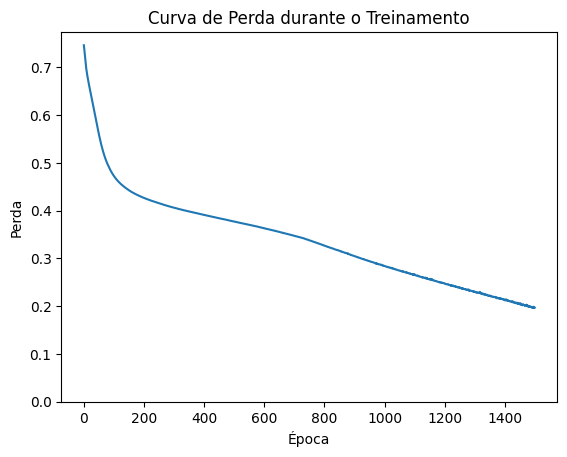

In [38]:
loss_values = clf_1.loss_curve_

plt.plot(loss_values)
plt.xlabel('Época')
plt.ylabel('Perda')
plt.title('Curva de Perda durante o Treinamento')
plt.ylim(bottom=0)
plt.show()

**Experimento 2:**

In [39]:
clf_2 = MLPClassifier(hidden_layer_sizes=(50, 50, 25), activation='tanh', solver='lbfgs', alpha=0.0001, max_iter=1500)

clf_2.fit(X_data, y_data) # treinando o modelo

MLPClassifier(activation='tanh', hidden_layer_sizes=(50, 50, 25), max_iter=1500,
              solver='lbfgs')

Acurácia do modelo escolhido:

In [40]:
clf_2.score(X_data_test, y_data_test)

0.7863636363636364

Assim, com 3 camadas intermediárias (50, 50, 25), função de ativação 'tanh' e utilizando o método lbfgs (aproximador do algoritmo BFGS), temos uma acurácia de 78,63%.

In [41]:
# não há curva de perda quando solver='lbfgs'

**Experimento 3:**

In [42]:
clf_3 = MLPClassifier(hidden_layer_sizes=(100, 50, 25), activation='relu', solver='adam', alpha=0.001, max_iter=1500)

clf_3.fit(X_data, y_data) # treinando o modelo

MLPClassifier(alpha=0.001, hidden_layer_sizes=(100, 50, 25), max_iter=1500)

Acurácia do modelo escolhido:

In [43]:
clf_3.score(X_data_test, y_data_test)

0.8136363636363636

Assim, com 3 camadas intermediárias (100, 50, 25), função de ativação 'relu' e utilizando o método adam (versão extendida do sgd), temos uma acurácia de 81,36%.

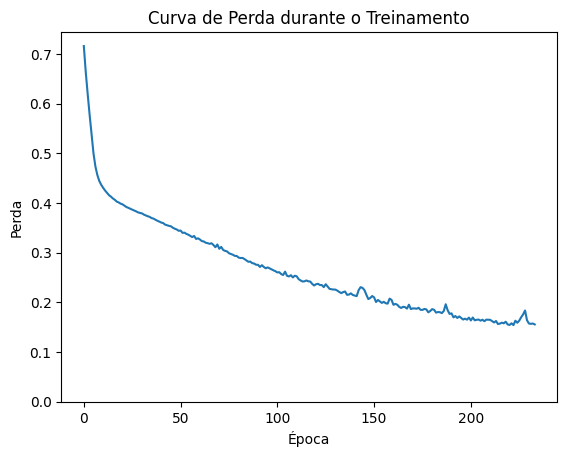

In [44]:
loss_values = clf_3.loss_curve_

plt.plot(loss_values)
plt.xlabel('Época')
plt.ylabel('Perda')
plt.title('Curva de Perda durante o Treinamento')
plt.ylim(bottom=0)
plt.show()

**Experimento 4:**

In [51]:
clf_4 = MLPClassifier(hidden_layer_sizes=(50, 25), activation='tanh', solver='adam', alpha=0.001, max_iter=1500)

clf_4.fit(X_data, y_data) # treinando o modelo

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1500) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(activation='tanh', alpha=0.001, hidden_layer_sizes=(50, 25),
              max_iter=1500)

Acurácia do modelo escolhido:

In [52]:
clf_4.score(X_data_test, y_data_test)

0.8181818181818182

Assim, com 2 camadas intermediárias (50, 25), função de ativação 'tanh' e utilizando o método adam (versão extendida do sgd), temos uma acurácia de 81,81%, semelhante ao Experimento 1.

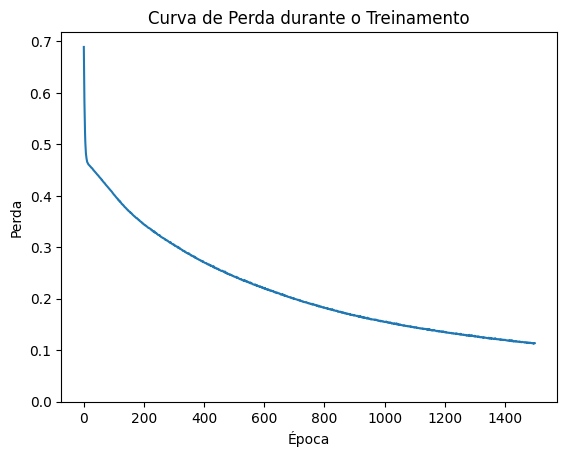

In [54]:
loss_values = clf_4.loss_curve_

plt.plot(loss_values)
plt.xlabel('Época')
plt.ylabel('Perda')
plt.title('Curva de Perda durante o Treinamento')
plt.ylim(bottom=0)
plt.show()

**Experimento 5:**

Como é possível ver na célula abaixo, estamos utilizando o GridSearchCV() (3-fold) para otimizar o parâmetros.

In [55]:
clf_5 = MLPClassifier(max_iter=1000)

param_grid = {
    'hidden_layer_sizes': [(50,), (100,), (50, 50), (100, 100)],
    'activation': ['relu', 'tanh'],
    'solver': ['adam', 'sgd'],
    'alpha': [0.0001, 0.001, 0.01],
    'learning_rate': ['constant', 'adaptive'],
}

grid_search = GridSearchCV(clf_5, param_grid, cv=3, scoring="accuracy", return_train_score=True)
grid_search.fit(X_data, y_data)


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perce

GridSearchCV(cv=3, estimator=MLPClassifier(max_iter=1000),
             param_grid={'activation': ['relu', 'tanh'],
                         'alpha': [0.0001, 0.001, 0.01],
                         'hidden_layer_sizes': [(50,), (100,), (50, 50),
                                                (100, 100)],
                         'learning_rate': ['constant', 'adaptive'],
                         'solver': ['adam', 'sgd']},
             return_train_score=True, scoring='accuracy')

In [56]:
clf_5 = grid_search.best_estimator_ # utilizando o modelo encontrado pelo GridSearchCV

In [57]:
clf_5.get_params() # parâmetros escolhidos pelo GridSearchCV

{'activation': 'tanh',
 'alpha': 0.001,
 'batch_size': 'auto',
 'beta_1': 0.9,
 'beta_2': 0.999,
 'early_stopping': False,
 'epsilon': 1e-08,
 'hidden_layer_sizes': (50, 50),
 'learning_rate': 'constant',
 'learning_rate_init': 0.001,
 'max_fun': 15000,
 'max_iter': 1000,
 'momentum': 0.9,
 'n_iter_no_change': 10,
 'nesterovs_momentum': True,
 'power_t': 0.5,
 'random_state': None,
 'shuffle': True,
 'solver': 'adam',
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': False,
 'warm_start': False}

Acurácia do modelo escolhido pelo GridSearchCV:

In [58]:
clf_5.score(X_data_test, y_data_test)

0.7954545454545454

Assim, com 2 camadas intermediárias (50, 50), função de ativação 'tanh' e utilizando o método adam (versão extendida do sgd), temos uma acurácia de 79,54%.

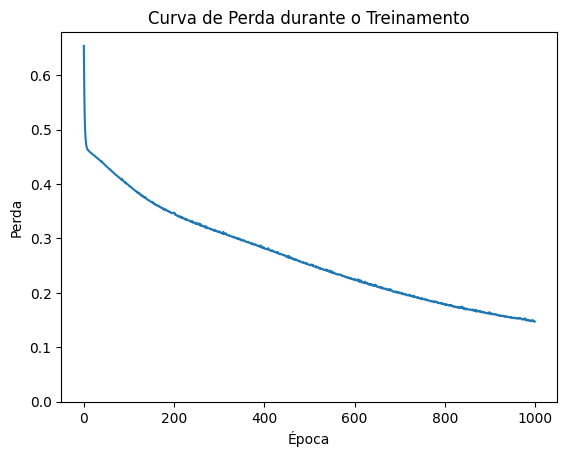

In [60]:
#g = plot_learning_curve(clf_5,"Curvas de aprendizado do modelo escolhido pelo GridSearchCV",X_data_test,y_data_test,cv=3)
loss_values = clf_5.loss_curve_

plt.plot(loss_values)
plt.xlabel('Época')
plt.ylabel('Perda')
plt.title('Curva de Perda durante o Treinamento')
plt.ylim(bottom=0)
plt.show()

**Experimento 6:**

In [68]:
clf_6 = MLPClassifier(hidden_layer_sizes=(200), activation='tanh', solver='adam', alpha=0.001, max_iter=1500)

clf_6.fit(X_data, y_data) # treinando o modelo

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1500) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(activation='tanh', alpha=0.001, hidden_layer_sizes=200,
              max_iter=1500)

Acurácia do modelo escolhido:

In [69]:
clf_6.score(X_data_test, y_data_test)

0.8454545454545455

Assim, com 1 camadas intermediária (200), função de ativação 'tanh' e utilizando o método adam (versão extendida do sgd), temos uma acurácia de 84,54%.

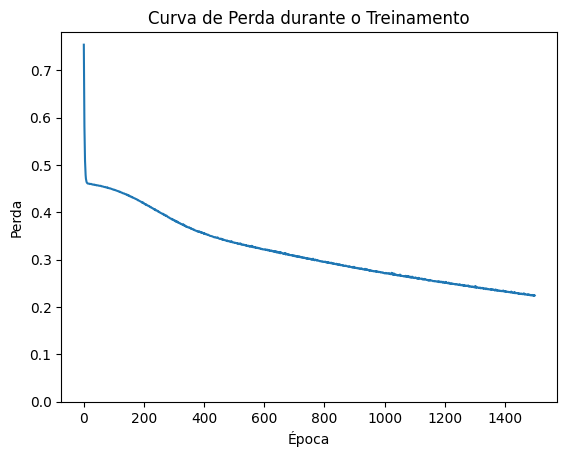

In [70]:
loss_values = clf_6.loss_curve_

plt.plot(loss_values)
plt.xlabel('Época')
plt.ylabel('Perda')
plt.title('Curva de Perda durante o Treinamento')
plt.ylim(bottom=0)
plt.show()

Agora vamos treinar o melhor modelo encontrado, o qual é o resultante do Experimento 6, e, assim, treiná-lo em toda a base train.csv.

Após isso, testá-lo com a base test.csv.

Por fim, submeter o resultado no Kaggle para receber o score respectivo.

In [78]:
clf_final = MLPClassifier(hidden_layer_sizes=(200), activation='tanh', solver='adam', alpha=0.001, max_iter=1500)
clf_final.fit(X_data_final, y_data_final)

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1500) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(activation='tanh', alpha=0.001, hidden_layer_sizes=200,
              max_iter=1500)

In [89]:
titanic_test_data = pd.read_csv('data/test.csv') # aplicando o tratamento de dados ao dataset em test.csv
final_test_data = pipeline.fit_transform(titanic_test_data)
final_test_data = final_test_data.fillna(method='ffill')
scaler = StandardScaler()
final_test_data = scaler.fit_transform(final_test_data)
predictions = clf_final.predict(final_test_data)

In [90]:
final_df = pd.DataFrame(titanic_test_data['PassengerId'])
final_df['Survived'] = predictions
final_df.to_csv('data/predictions.csv', index=False)

In [88]:
clf_7 = MLPClassifier(hidden_layer_sizes=(50, 50), activation='tanh', solver='adam', alpha=0.001, max_iter=1500)
clf_7.fit(X_data_final, y_data_final)
predictions3 = clf_7.predict(final_test_data)
final_df3 = pd.DataFrame(titanic_test_data['PassengerId'])
final_df3['Survived'] = predictions3
final_df3.to_csv('data/predictions3.csv', index=False)

## Resultados:

- Experimento 1: 4 camadas intermediárias (200, 100, 50, 25), função de ativação 'relu' e utilizando o método do gradiente descendente estocástico ⇒ **acurácia de 81,81%** nos 20% de train.csv.

- Experimento 2: 3 camadas intermediárias (50, 50, 25), função de ativação 'tanh' e utilizando o método lbfgs (aproximador do algoritmo BFGS) ⇒ **acurácia de 78,63%** nos 20% de train.csv.

- Experimento 3: 3 camadas intermediárias (100, 50, 25), função de ativação 'relu' e utilizando o método adam (versão extendida do sgd) ⇒ **uma acurácia de 81,36%** nos 20% de train.csv.

- Experimento 4: 2 camadas intermediárias (50, 25), função de ativação 'tanh' e utilizando o método adam (versão extendida do sgd) ⇒ **acurácia de 81,81%** nos 20% de train.csv.

- Experimento 5 (GridSearchCV): 2 camadas intermediárias (50, 50), função de ativação 'tanh' e utilizando o método adam (versão extendida do sgd) ⇒ **acurácia de 79,54%** nos 20% de train.csv.

- Experimento 6: 1 camadas intermediária (200), função de ativação 'tanh' e utilizando o método adam (versão extendida do sgd) ⇒ **acurácia de 84,54%** nos 20% de train.csv.

- Score no Kaggle do classificador final (mesmos parâmetros do Experimento 6 só que treinado em todo o train.csv): 73,68%.

- Score no Kaggle do classficador com os parâmetros escolhidos pelo GridSearchCV (só que treinado em todo o train.csv): 73,44%.